In [151]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
import pandas as pd


In [153]:
file = pd.read_csv("heart.csv")
file.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [154]:
for col in file.columns:
    print(col)



age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


In [155]:

x_train = np.array(file.values[:,0:-1])
print(x_train[0:4])


[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]]


In [156]:
x_train.shape

(303, 13)

In [157]:
x=x_train.reshape(-13,1)

In [158]:
y_train = np.array(file.values[:,-1])
print(y_train[0:4])


[1. 1. 1. 1.]


In [159]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train


array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# Bloom Filter

In [165]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict_proba(x_train)
        pred=pred[:,1]
        pred=pred.reshape(-1,1)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict_proba(x)
        initpred=initpred[:,1]
        initpred=initpred.reshape(-1,1)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    pred=pred.reshape(-1,1)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

# Logistic Regression Model

In [160]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10.0,random_state = 10,max_iter=100)
classifier.fit(x_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred = classifier.predict(x_train)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]


In [162]:
prob=classifier.predict_proba(x_train)
print(prob[:,1])

[8.06680882e-01 6.58433289e-01 9.61273715e-01 9.13827962e-01
 8.16096264e-01 7.61056922e-01 8.27585447e-01 8.47567181e-01
 7.91011945e-01 9.18386948e-01 6.18921901e-01 9.82937434e-01
 8.82006049e-01 7.30770919e-01 9.83818165e-01 9.73464163e-01
 9.91575045e-01 8.36804151e-01 5.99361762e-01 9.34189350e-01
 3.78700817e-01 9.13538173e-01 8.40995254e-01 5.01424665e-01
 8.50394298e-01 7.79623728e-01 8.64330567e-01 9.27755588e-01
 8.82774599e-01 6.94091666e-01 9.83332411e-01 5.42939727e-01
 9.24386574e-01 5.33550403e-01 5.86334778e-01 8.21232534e-01
 9.90549956e-01 6.39671213e-01 9.67622842e-01 9.23377268e-01
 8.61888422e-01 8.16823228e-01 1.30669982e-01 7.87917066e-01
 9.29858316e-01 8.96376362e-01 9.48212185e-01 9.06886236e-01
 9.94629717e-01 9.22711130e-01 9.76603414e-01 4.26622890e-01
 1.14806790e-01 9.94246888e-01 9.87782543e-01 7.38865711e-01
 8.48498646e-01 8.42380250e-01 9.87167297e-01 8.24087413e-01
 9.55749261e-01 7.84852770e-01 9.92777508e-01 8.79344555e-01
 9.33147600e-01 9.535878

In [163]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Accuracy :  0.8514851485148515


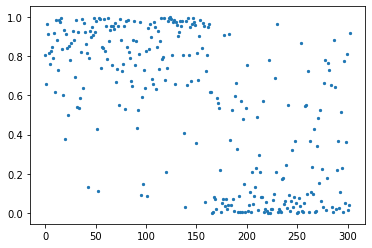

In [164]:
preds =prob[:,1]
plt.scatter(np.arange(len(preds)), preds, s=5)

In [166]:
m=200

In [167]:
bf=BloomFilter(m,classifier)

In [169]:
bf.add_init(x_train,y_train)

In [170]:
print(fpr_test(x_train,bf,y_train))

32
106
0.2318840579710145


In [189]:
import pickle
import os

In [190]:
filename1='logreg_heart.sav'
pickle.dump(classifier,open(filename1,'wb'))

In [191]:
model_size1=os.stat('logreg_heart.sav').st_size

In [192]:
print(model_size1)

887


# SVM Model

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score 


In [107]:
clf2 = svm.SVC(kernel='rbf',probability=True)
clf2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [108]:
preds=clf2.predict(x_train)

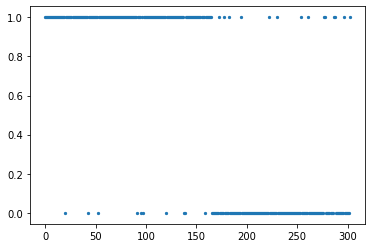

In [109]:
plt.scatter(np.arange(len(preds)), preds, s=5)

In [110]:
accuracy = accuracy_score(y_train.flatten(),preds)
print(accuracy)

0.9207920792079208


In [111]:
probability=clf2.predict_proba(x_train)
print(probability[:,1])
print(probability.shape)

[0.83795377 0.7054494  0.94193357 0.96510545 0.87031253 0.8703918
 0.90654886 0.80822976 0.87028628 0.90203127 0.87025151 0.97228329
 0.96518511 0.87024747 0.93992695 0.93607994 0.97653213 0.79205582
 0.84592717 0.87039721 0.28057601 0.97103662 0.92080149 0.57513552
 0.87028168 0.87033969 0.91782979 0.87029611 0.87037812 0.87030899
 0.92465935 0.67424742 0.94418714 0.72137418 0.81067721 0.8703144
 0.96236024 0.58085224 0.95796963 0.89996476 0.88274992 0.92518004
 0.37081981 0.90488087 0.92574193 0.95428396 0.96118994 0.92964172
 0.87022805 0.94046581 0.97695559 0.74408183 0.14314417 0.91433841
 0.97219324 0.81314976 0.87032787 0.86493451 0.92627296 0.87032407
 0.87027957 0.8129524  0.92062381 0.87027666 0.95694436 0.87703941
 0.87030854 0.9554127  0.96803519 0.96955733 0.57523914 0.86306028
 0.8823408  0.83206425 0.96404477 0.91647522 0.87036082 0.87022937
 0.95829811 0.81399804 0.97552878 0.91175968 0.96238059 0.87023793
 0.85558956 0.87035609 0.68189413 0.87025747 0.93639439 0.870256

In [121]:
m=200
bf=BloomFilter(m,clf2)
bf.add_init(x_train,y_train)

In [122]:
print(fpr_test(x_train,bf,y_train))

13
125
0.09420289855072464


In [115]:
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [193]:
filename2='svm_heart.sav'
pickle.dump(classifier,open(filename2,'wb'))

In [194]:
model_size2=os.stat('svm_heart.sav').st_size

In [195]:
print(model_size)

887
